In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns

In [2]:
df =pd.read_csv("C:\\Users\\91892\\Downloads\\course\\assig 16 Neural Networks\\gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

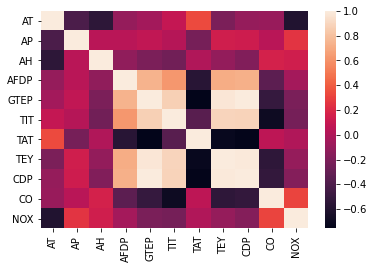

In [6]:
sns.heatmap(data = df.corr())

In [7]:
X= df.drop(["TEY", "GTEP"], axis=1)
X.head()

,AT,AP,AH,AFDP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,1059.7,549.98,10.612,3.2484,82.311


In [9]:
y = pd.DataFrame({"TEY":df.iloc[:,7]})
y.head()

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [13]:

classifier = Sequential()

 
classifier.add(Dense(units=30, activation= "relu", input_dim=9))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=35,  activation= "relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=30, activation= "relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=1,  activation= "linear")
classifier.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])

In [14]:

model_history = classifier.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
737/737 [==============================] - 4s 5ms/step - loss: 3459.2041 - mae: 42.8608 - mse: 3459.2041 - val_loss: 225.9235 - val_mae: 11.7371 - val_mse: 225.9235
Epoch 2/100
737/737 [==============================] - 3s 4ms/step - loss: 758.2780 - mae: 22.0517 - mse: 758.2780 - val_loss: 106.1656 - val_mae: 7.9565 - val_mse: 106.1656
Epoch 3/100
737/737 [==============================] - 3s 4ms/step - loss: 584.1542 - mae: 19.4036 - mse: 584.1542 - val_loss: 49.0614 - val_mae: 5.1211 - val_mse: 49.0614
Epoch 4/100
737/737 [==============================] - 3s 4ms/step - loss: 493.9803 - mae: 17.6751 - mse: 493.9803 - val_loss: 32.0067 - val_mae: 4.2012 - val_mse: 32.0067
Epoch 5/100
737/737 [==============================] - 3s 4ms/step - loss: 450.5479 - mae: 16.8808 - mse: 450.5479 - val_loss: 25.5212 - val_mae: 3.9697 - val_mse: 25.5212
Epoch 6/100
737/737 [==============================] - 3s 4ms/step - loss: 403.7597 - mae: 16.0063 - mse: 403.7597 - val_loss: 25.595

Epoch 49/100
737/737 [==============================] - 3s 4ms/step - loss: 194.8778 - mae: 11.0511 - mse: 194.8778 - val_loss: 2.8139 - val_mae: 1.3780 - val_mse: 2.8139
Epoch 50/100
737/737 [==============================] - 3s 5ms/step - loss: 186.5779 - mae: 10.8006 - mse: 186.5779 - val_loss: 2.8157 - val_mae: 1.2475 - val_mse: 2.8157
Epoch 51/100
737/737 [==============================] - 3s 4ms/step - loss: 192.0810 - mae: 10.8810 - mse: 192.0810 - val_loss: 12.5956 - val_mae: 2.9960 - val_mse: 12.5956
Epoch 52/100
737/737 [==============================] - 3s 4ms/step - loss: 195.3349 - mae: 11.0233 - mse: 195.3349 - val_loss: 9.4578 - val_mae: 2.3886 - val_mse: 9.4578
Epoch 53/100
737/737 [==============================] - 3s 4ms/step - loss: 191.3063 - mae: 10.8528 - mse: 191.3063 - val_loss: 22.0173 - val_mae: 4.0360 - val_mse: 22.0173
Epoch 54/100
737/737 [==============================] - 3s 4ms/step - loss: 191.6856 - mae: 10.8644 - mse: 191.6856 - val_loss: 5.0961 - val_

Epoch 97/100
737/737 [==============================] - 3s 4ms/step - loss: 157.2318 - mae: 9.8853 - mse: 157.2318 - val_loss: 10.8409 - val_mae: 2.6306 - val_mse: 10.8409
Epoch 98/100
737/737 [==============================] - 3s 4ms/step - loss: 159.8634 - mae: 9.9325 - mse: 159.8634 - val_loss: 2.2167 - val_mae: 1.0184 - val_mse: 2.2167
Epoch 99/100
737/737 [==============================] - 3s 4ms/step - loss: 162.2095 - mae: 9.9856 - mse: 162.2095 - val_loss: 7.6721 - val_mae: 2.4782 - val_mse: 7.6721
Epoch 100/100
737/737 [==============================] - 3s 4ms/step - loss: 159.0911 - mae: 9.8888 - mse: 159.0911 - val_loss: 15.8824 - val_mae: 3.4079 - val_mse: 15.8824


In [15]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


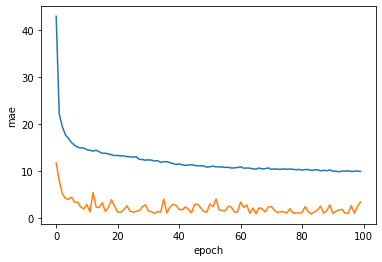

In [16]:
plt.xlabel("epoch")
plt.ylabel("mae")
plt.plot(model_history.epoch, model_history.history["mae"] )
plt.plot(model_history.epoch, model_history.history["val_mae"] )
plt.show()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
y_pred

array([[131.60307],
       [111.81974],
       [131.67787],
       ...,
       [149.91287],
       [130.18417],
       [150.14009]], dtype=float32)

In [19]:
y_test= y_test.reset_index(drop= True)
y_test

,TEY
0,134.46
1,111.88
2,133.72
3,133.79
4,110.77
...,...
4507,134.08
4508,102.87
4509,155.96
4510,133.67


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
r2_score(y_test, y_pred)

0.9378517261626609

In [22]:
mean_absolute_error(y_test, y_pred)

3.361033813260126

In [23]:
mean_squared_error(y_test, y_pred)

15.682206280385808

In [24]:
pred_df= pd.DataFrame(y_pred, columns=["TEY"])

In [25]:
cpm_df=pd.concat([y_test, pred_df], axis=1, ignore_index=False)
cpm_df.columns= ["Actual_TEY", "Pred_TEY"]
cpm_df.head()

,Actual_TEY,Pred_TEY
0,134.46,131.603073
1,111.88,111.819740
2,133.72,131.677872
3,133.79,131.058517
4,110.77,110.721817


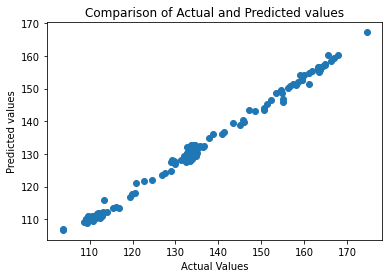

In [26]:
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Comparison of Actual and Predicted values")
plt.scatter(cpm_df.iloc[0:200, 0], cpm_df.iloc[0:200, 1])